In [1]:
import MoireLattice
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lattice parameters 
#lattices with different normalizations
modulation_theta=1.05
Nsamp=6
theta=modulation_theta*np.pi/180  # magic angle
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one
[KX,KY]=lq.Generate_lattice()
Npoi=np.size(KX); print(Npoi, "numer of sampling lattice points")
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)
umkl=0
print(f"taking {umkl} umklapps")
VV=lq.boundary()

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.003985166549682617  s
37 numer of sampling lattice points
taking 0 umklapps


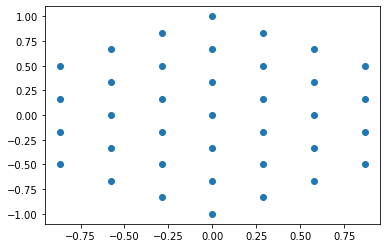

In [3]:
plt.scatter(KX, KY)

In [4]:
GM1p, GM2p=lq.GMvec
GM1=-GM2p
GM2=GM1p+GM2p
LP=3
nn1=np.arange(0,LP,1)
nn2=np.arange(0,LP,1)

nn_1,nn_2=np.meshgrid(nn1,nn2)
n1=nn_1.flatten()
n2=nn_2.flatten()

In [5]:
KXp=n1*GM1[0]/LP+n2*GM2[0]/LP
KYp=n1*GM1[1]/LP+n2*GM2[1]/LP


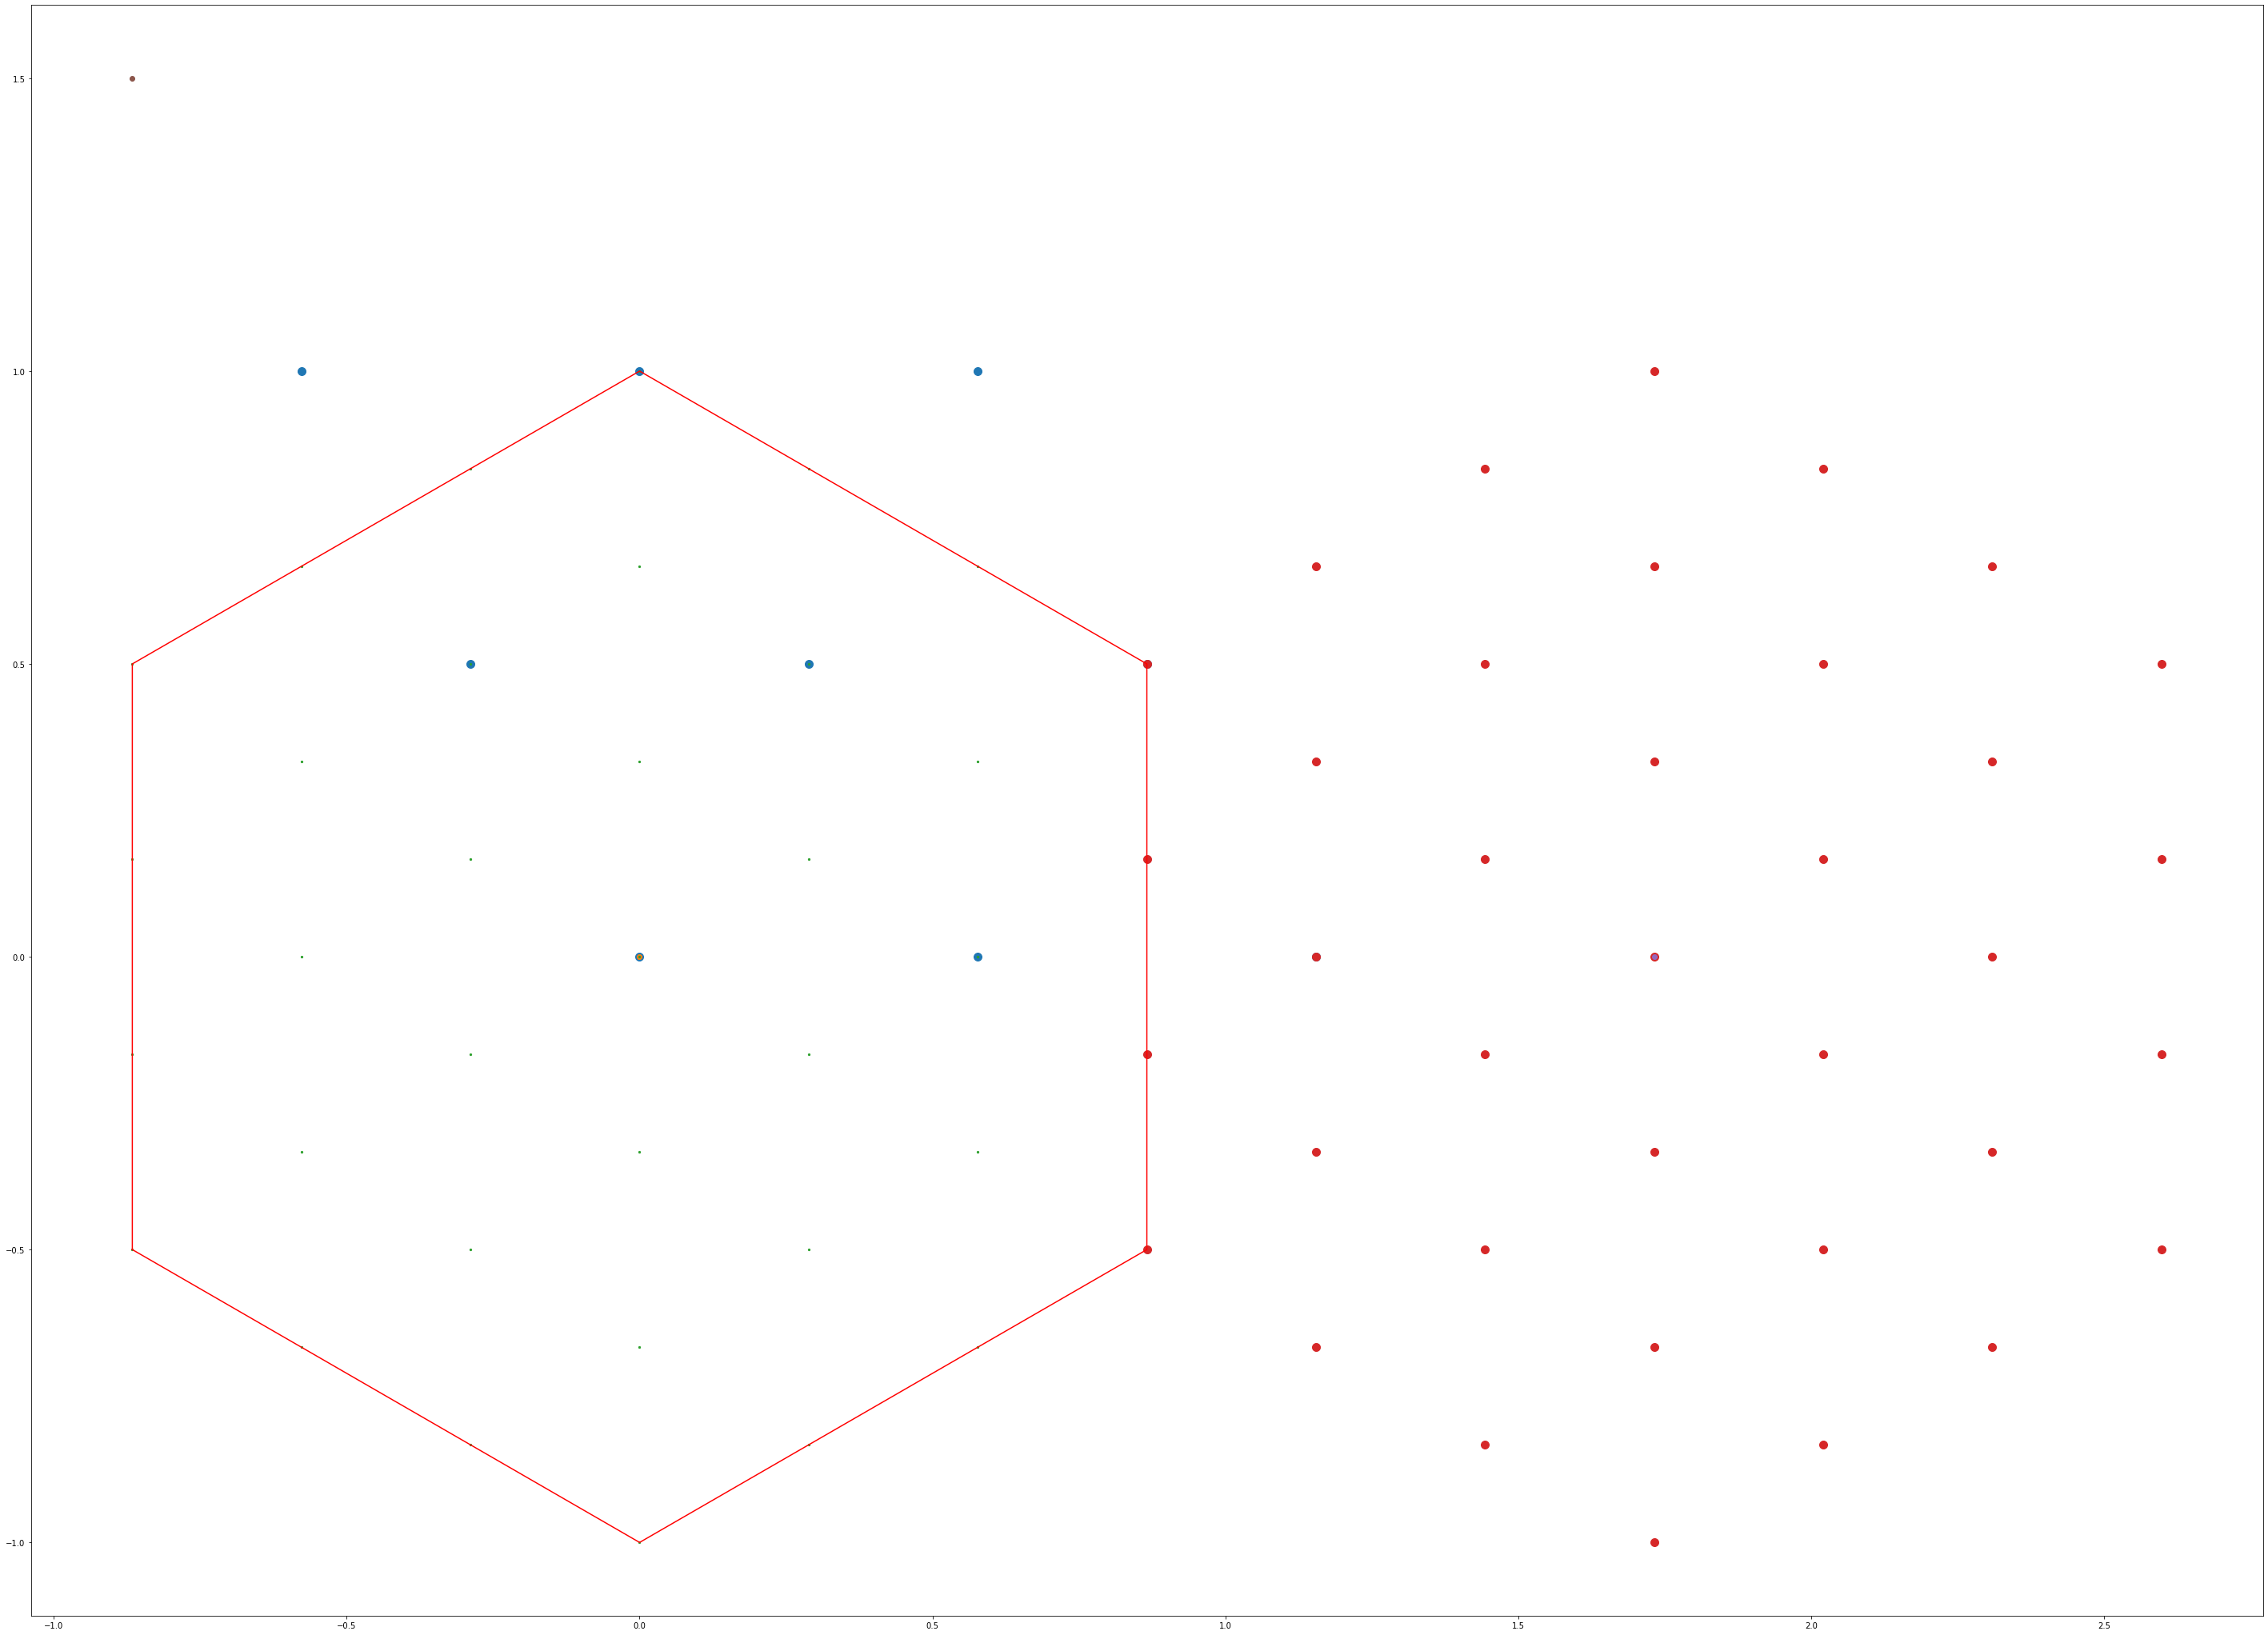

In [6]:
plt.figure(figsize=(50,50)) #fig size same as before
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(KXp, KYp, s=100)
plt.scatter(GM2[0]*0, GM2[1]*0)
plt.scatter(KX, KY, s=5)
plt.scatter(KX+GM1[0], KY+GM1[1], s=100)
plt.scatter(GM1[0], GM1[1])
plt.scatter(GM2[0], GM2[1])
ax.set_aspect('equal')

In [7]:
GM1p, GM2p=lq.GMvec
GM1=-GM2p
GM2=GM1p+GM2p
LP=18
nn1=np.arange(0,LP,1)
nn2=np.arange(0,LP,1)

nn_1,nn_2=np.meshgrid(nn1,nn2)
n1=nn_1.flatten()
n2=nn_2.flatten()

In [8]:
KXp=n1*GM1[0]/LP+n2*GM2[0]/LP
KYp=n1*GM1[1]/LP+n2*GM2[1]/LP

KXppp=KXp+np.sqrt(3)*0.5*GM1[0]/LP
KYppp=KYp+np.sqrt(3)*0.5*GM1[1]/LP
KXpp=KXp-np.sqrt(3)*0.5*GM1[0]/LP
KYpp=KYp-np.sqrt(3)*0.5*GM1[1]/LP

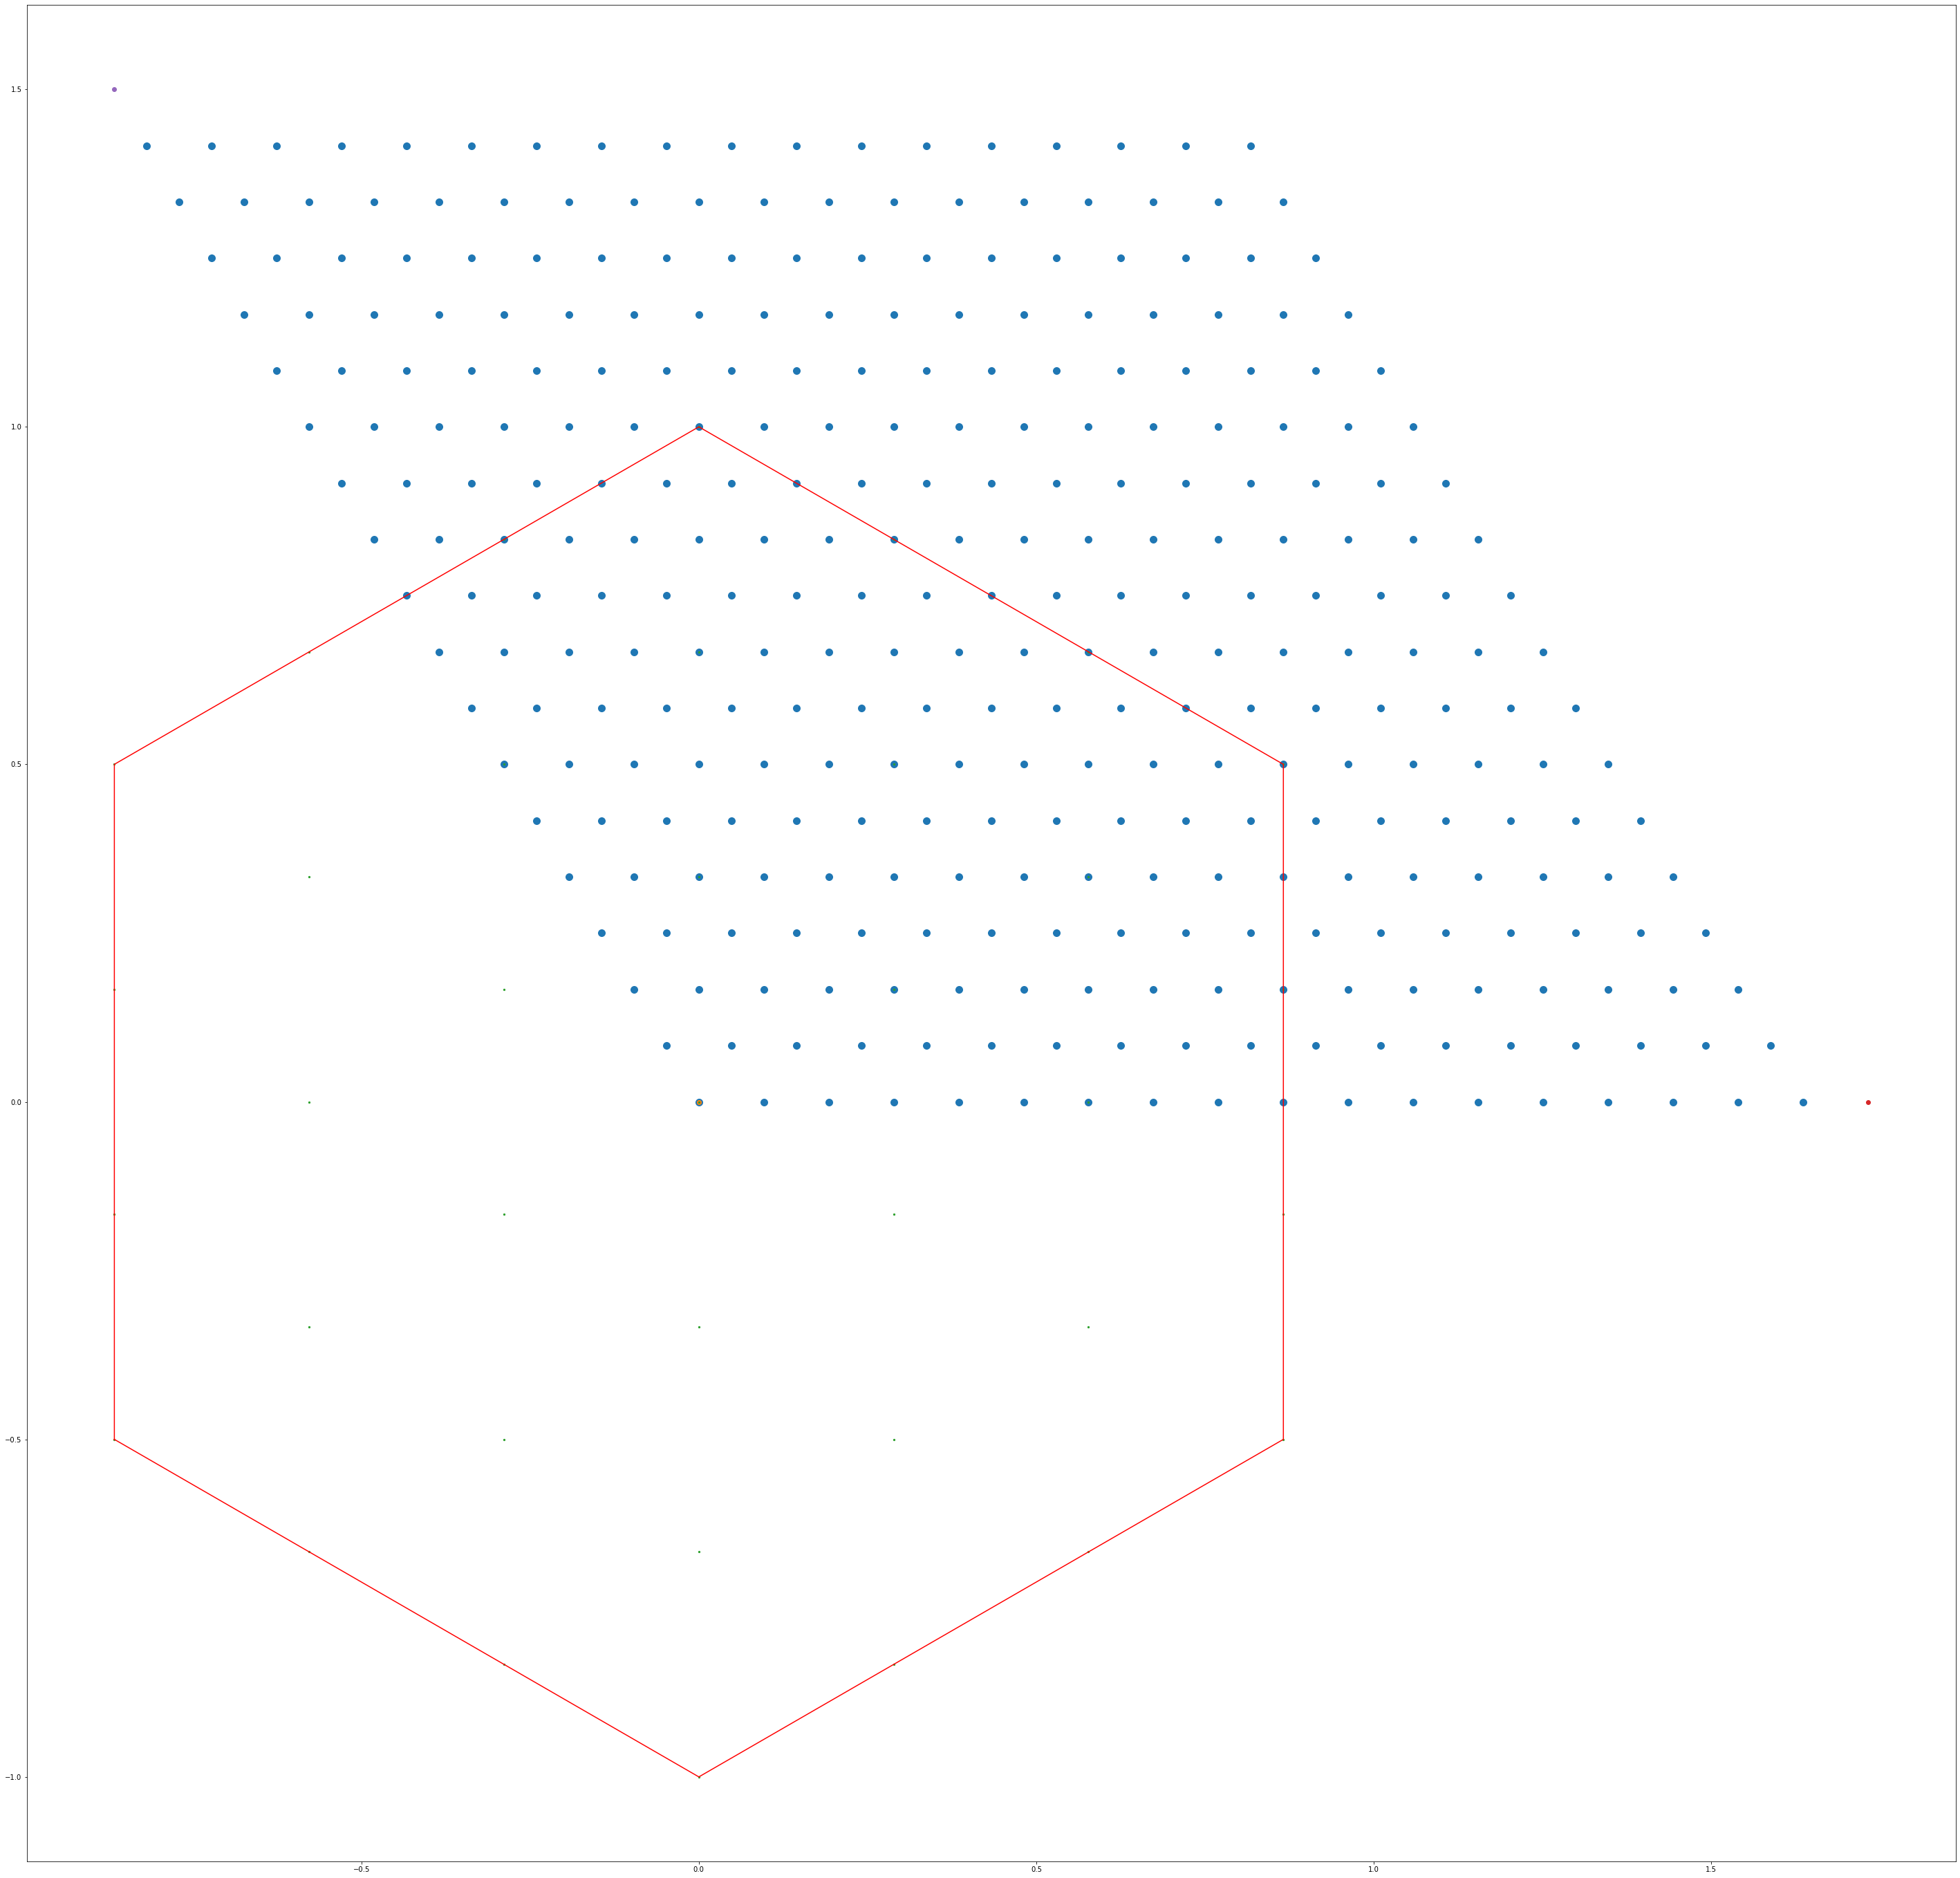

In [9]:
plt.figure(figsize=(50,50)) #fig size same as before
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(KXp, KYp, s=100)
plt.scatter(GM2[0]*0, GM2[1]*0)
plt.scatter(KX, KY, s=5)
# plt.scatter(KX+GM1[0], KY+GM1[1], s=100)
plt.scatter(GM1[0], GM1[1])
plt.scatter(GM2[0], GM2[1])
ax.set_aspect('equal')

#algorithm for folding the BZ, for each element of the 1NN vectors
#shift and filter whether things are contained < not inclusive, then pop everytime I find non inclusive contains
#and modify by attaching the new vectors. 

In [10]:
Ulist=lq.Umklapp_List(1)

In [11]:
# GM1p, GM2p=lq.GMvec
Vertices_list, Gamma, K, Kp, M, Mp= lq.FBZ_points(GM1p, GM2p)
k_window_sizey = K[2][1] 
k_window_sizex = K[1][0]
print(k_window_sizey,k_window_sizex)

0.9999999999999999 0.8660254037844388


In [12]:
def hexagon3(pos, Radius_inscribed_hex):
        Y,X = map(abs, pos) #taking the absolute value of the rotated hexagon, only first quadrant matters
        kx=[]
        ky=[]
        for i in range(np.size(X)):
            if (Y[i] <= np.sqrt(3)* min(Radius_inscribed_hex - X[i], Radius_inscribed_hex / 2)):
                kx.append(pos[0][i])
                ky.append(pos[1][i])
                    
        return kx,ky    

def hexagon4(pos, Radius_inscribed_hex):
        Y,X = map(abs, pos) #taking the absolute value of the rotated hexagon, only first quadrant matters
        kx=[]
        ky=[]
        for i in range(np.size(X)):
            if (Y[i] < np.sqrt(3)* min(Radius_inscribed_hex - X[i], Radius_inscribed_hex / 2)):
                kx.append(pos[0][i])
                ky.append(pos[1][i])
                    
        return kx,ky   

1.0277777777777777 0.9722222222222222


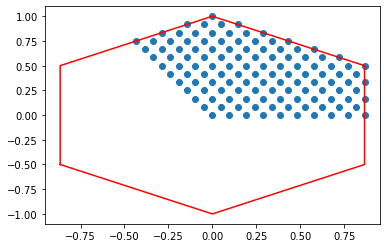

[-1, -1]


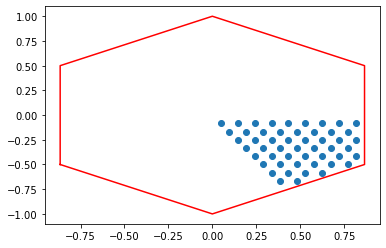

[-1, 0]


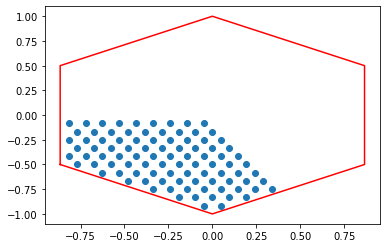

[0, -1]


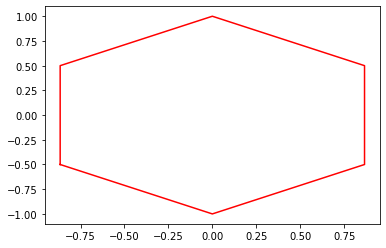

[0, 0]
[0, 1]


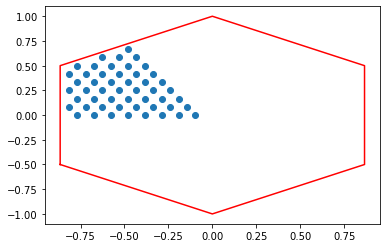

[1, 0]


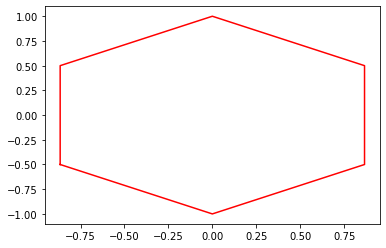

[1, 1]


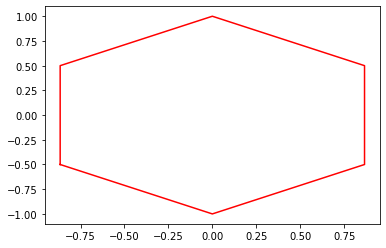

In [13]:
GM1p, GM2p=lq.GMvec
kxx=[]
kyy=[]

uc=1+0.5/LP
dc=1-0.5/LP
print(uc,dc)
kx,ky=hexagon3([KXp, KYp], uc*k_window_sizey)
kxx=kxx+kx
kyy=kyy+ky
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(kx,ky)
plt.show()

for U in Ulist:
    G=GM1p*U[0]+GM2p*U[1]
    print(U)
    # kx,ky=hexagon3([KXp+G[0], KYp+G[1]], 0.999999*k_window_sizey)
    # kxx=kxx+kx
    # kyy=kyy+ky
    # plt.plot(VV[:,0], VV[:,1], c='r')
    # plt.scatter(kx,ky)
    # plt.show()
    if not (U[0]==0 and U[1]==0):
        kx,ky=hexagon3([KXp+G[0], KYp+G[1]], dc*k_window_sizey)
        kxx=kxx+kx
        kyy=kyy+ky
        plt.plot(VV[:,0], VV[:,1], c='r')
        plt.scatter(kx,ky)
        plt.show()

        

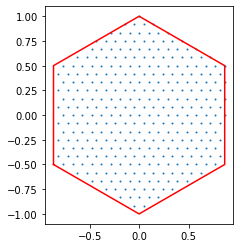

In [14]:
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(kxx,kyy,s=1)
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 

In [15]:
len(kxx)

320

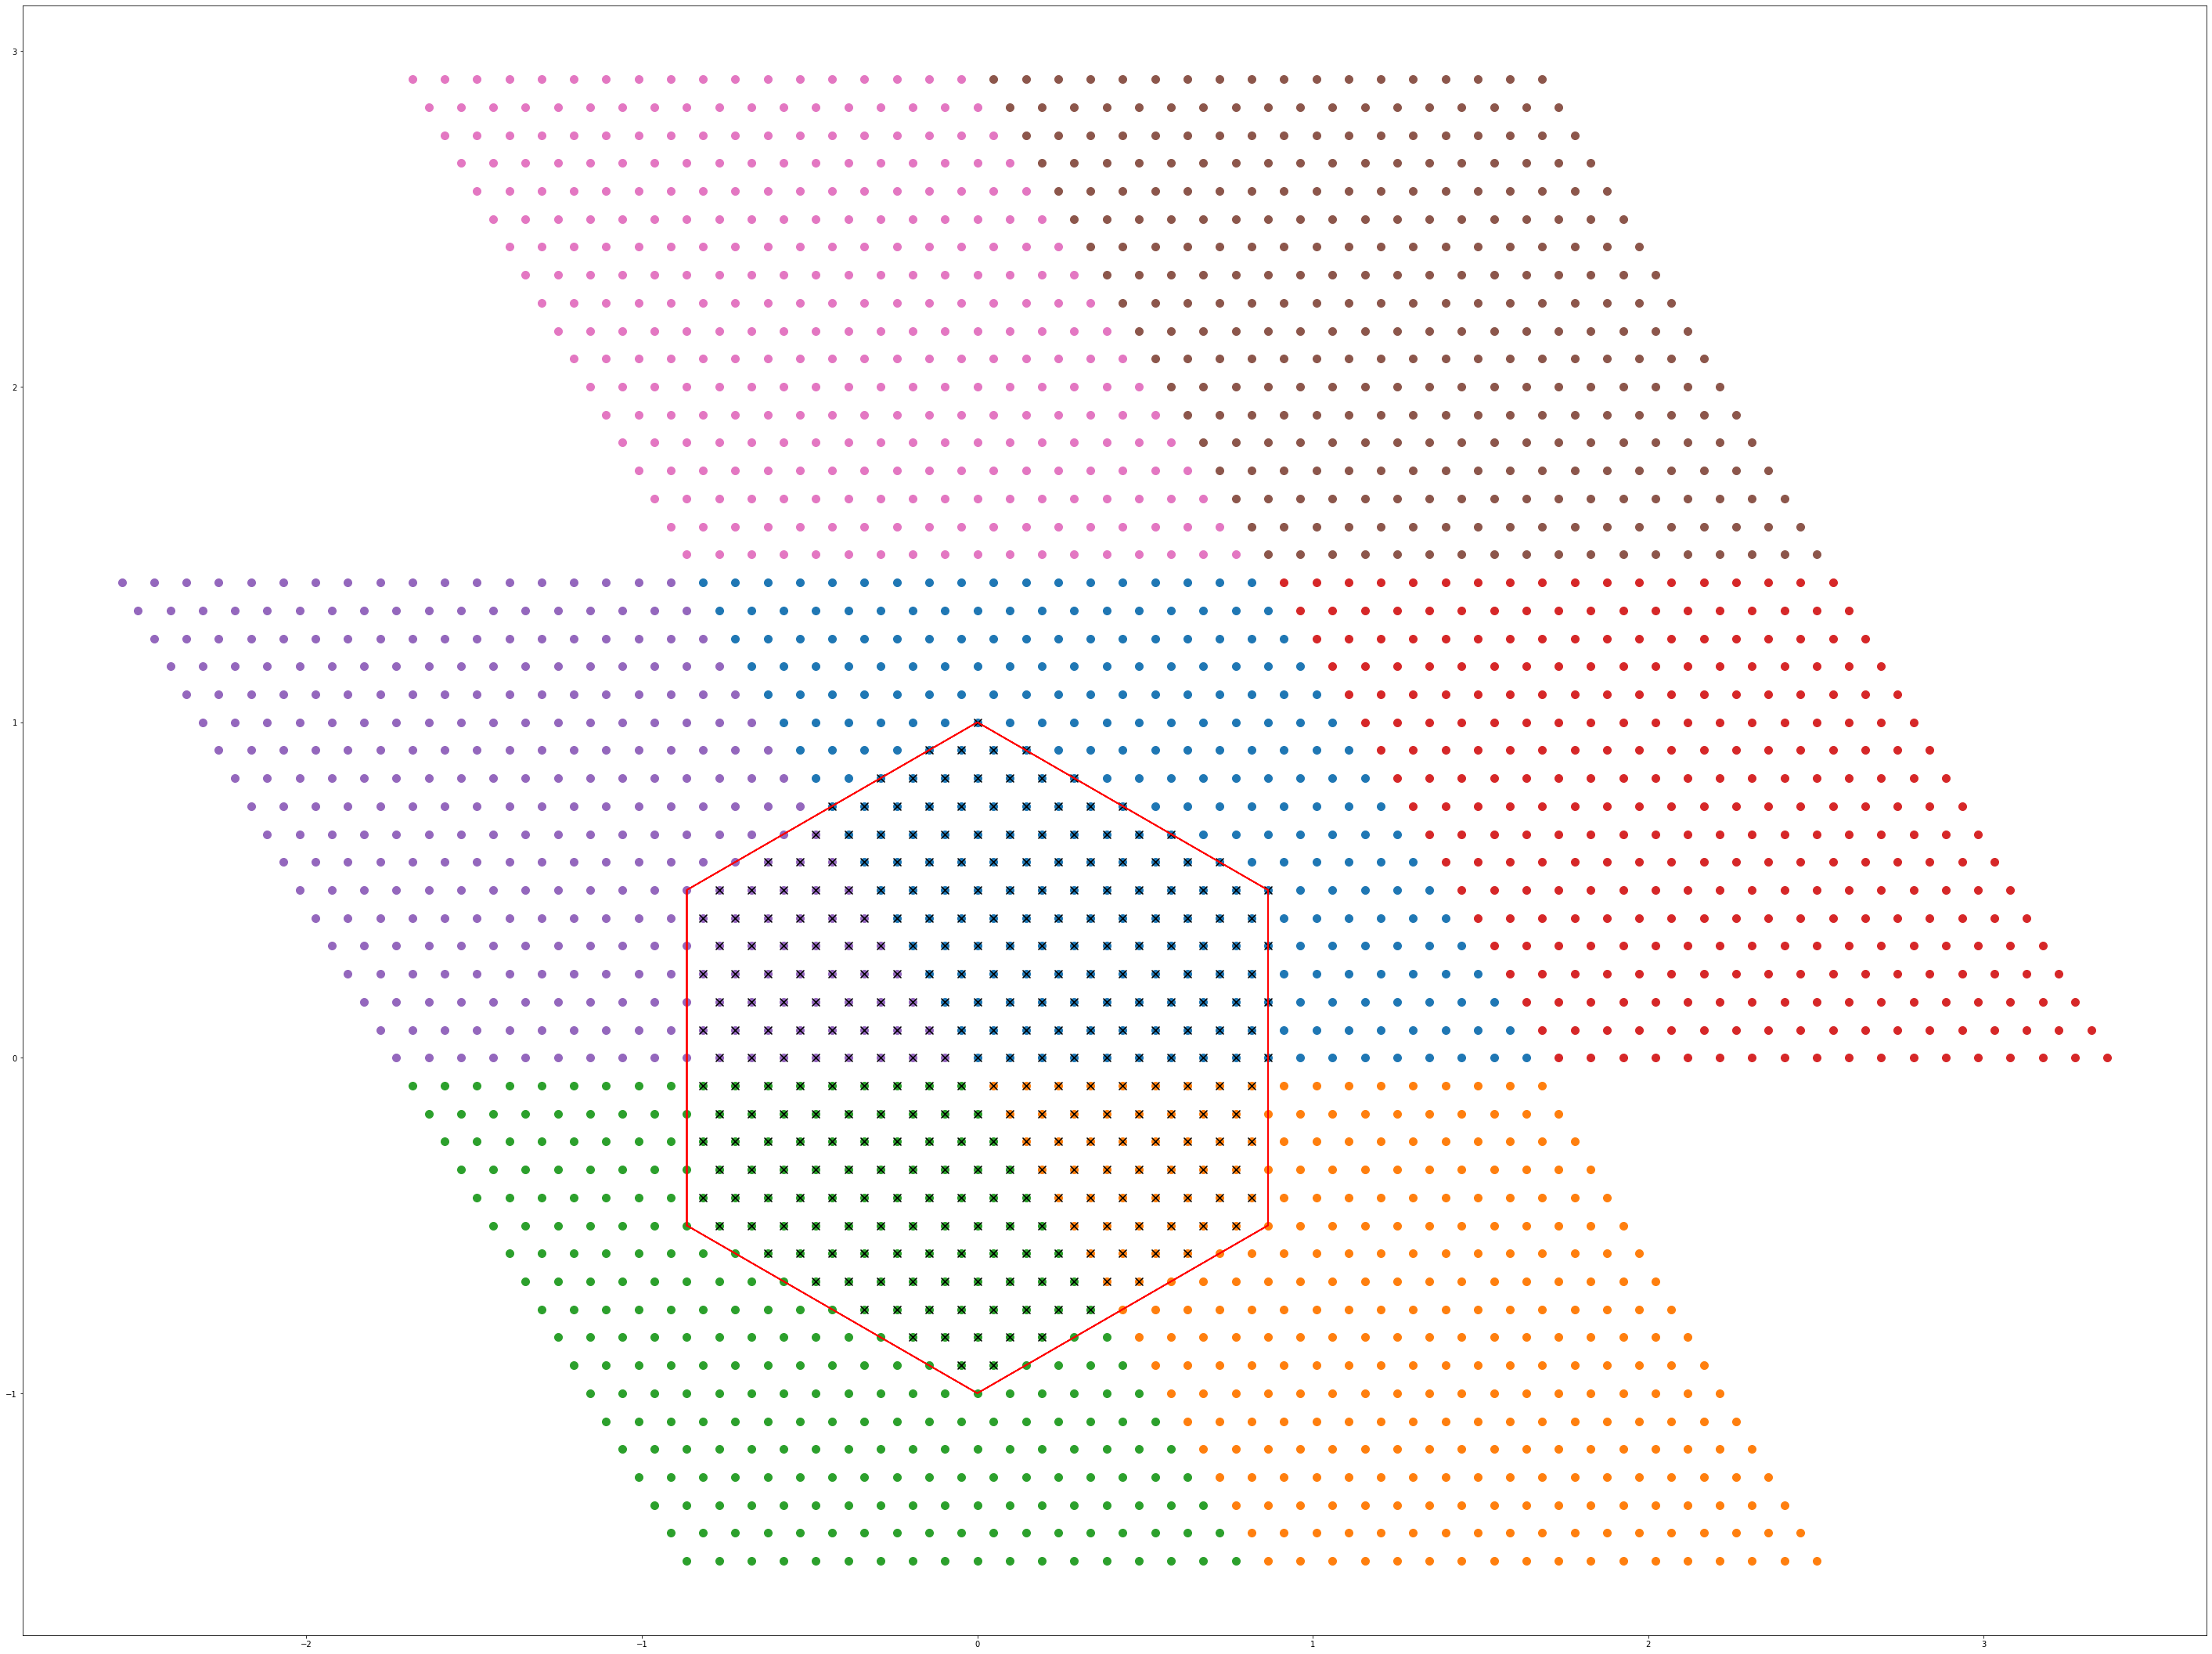

In [16]:
plt.figure(figsize=(50,50)) #fig size same as before
plt.scatter(KXp, KYp,s=100)
for U in Ulist:
    G=GM1p*U[0]+GM2p*U[1]
    if not (U[0]==0 and U[1]==0):
        plt.plot(VV[:,0], VV[:,1], c='r')
        plt.scatter(KXp+G[0], KYp+G[1],s=100)
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(kxx,kyy,marker='x',c='k',s=100)
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 


In [17]:
def checkpoints(kx,ky,KXp,KYp,KXpq,KYpq):
    nn=len(KYpq)
    nn2=len(kx)
    eps=1e-6
    exkx=[]
    exky=[]
    for i in range(nn):
        c=0
        for j in range(nn2):
            if ( np.sqrt( (KXpq[i]-kx[j])**2 + (KYpq[i]-ky[j])**2  )<eps):
                c=c+1
            
        if c==0:
            exkx.append(KXp[i])
            exky.append(KYp[i])
    return exkx,exky

def checkpoints_add(kx,ky,KXp,KYp,KXpq,KYpq):
    nn=len(KYpq)
    nn2=len(kx)
    eps=1e-6
    efxkx=[]
    efxky=[]
    for i in range(nn):
        for j in range(nn2):
            if ( np.sqrt( (KXpq[i]-kx[j])**2 + (KYpq[i]-ky[j])**2  )<eps):
                efxkx.append(KXpq[i])
                efxky.append(KYpq[i])

    return KXp+efxkx,KYp+efxky

         
        
GM1p, GM2p=lq.GMvec
GM1=-GM2p
GM2=GM1p+GM2p
LP=24
nn1=np.arange(0,LP,1)
nn2=np.arange(0,LP,1)

nn_1,nn_2=np.meshgrid(nn1,nn2)
n1=nn_1.flatten()
n2=nn_2.flatten()

KXp=n1*GM1[0]/LP+n2*GM2[0]/LP
KYp=n1*GM1[1]/LP+n2*GM2[1]/LP

    

1.0208333333333333 0.9791666666666666


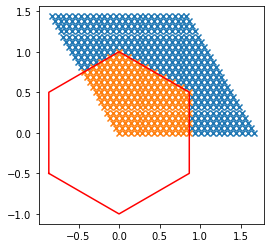

[-1, -1]
92 271


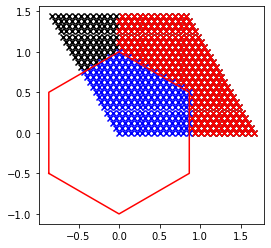

271
[-1, 0]
173 98


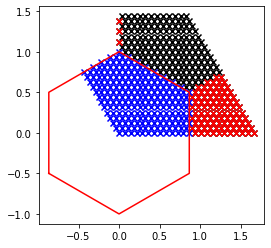

98
[0, -1]
0 98


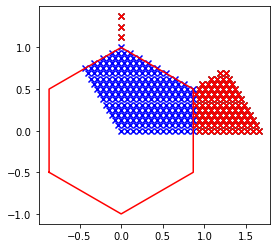

98
[0, 0]
[0, 1]
92 6


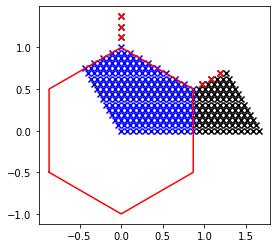

6
[1, 0]
0 6


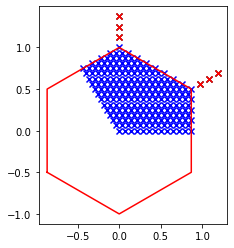

6
[1, 1]
0 6


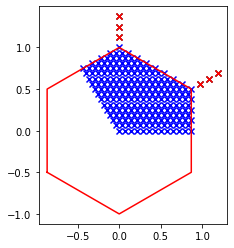

6


In [18]:
GM1p, GM2p=lq.GMvec
kxx=[]
kyy=[]

uc=1+0.5/LP
dc=1-0.5/LP
print(uc,dc)
kx,ky=hexagon3([KXp, KYp], uc*k_window_sizey)
kxx=kxx+kx
kyy=kyy+ky
exkx,exky=checkpoints(kx,ky,KXp,KYp,KXp,KYp)
xkx,xky=checkpoints_add(kx,ky,[],[],KXp,KYp)
plt.scatter(exkx,exky, marker='x')
plt.scatter(xkx,xky, marker='x')
plt.plot(VV[:,0], VV[:,1], c='r')
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.show()

for U in Ulist:
    G=GM1p*U[0]+GM2p*U[1]
    print(U)
    if not (U[0]==0 and U[1]==0):
        
        kx,ky=hexagon3([KXp+G[0], KYp+G[1]], dc*k_window_sizey)
        plt.scatter(exkx,exky, marker='x',c='k')
        exkx,exky=checkpoints(kx,ky,exkx,exky,exkx+G[0],exky+G[1])
        xkxp,xkyp=checkpoints_add(kx,ky,xkx,xky,xkx+G[0],xky+G[1])
        plt.scatter(exkx,exky, marker='x',c='r')
        plt.scatter(xkxp,xkyp, marker='x',c='b')
        kxx=kxx+kx
        kyy=kyy+ky
        print(len(kx), len(exkx))
        plt.plot(VV[:,0], VV[:,1], c='r')
        # plt.scatter(kx,ky)
        ax = plt.gca() #you first need to get the axis handle
        ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
        plt.show()
        print(len(exkx))



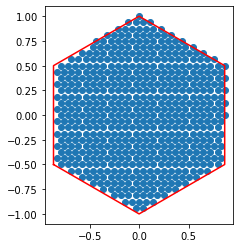

570

In [19]:
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(kxx,kyy)
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.show()
len(kxx)

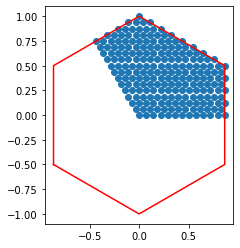

570

In [20]:
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(xkx,xky)
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.show()
len(kxx)

In [21]:

def hexagon3(pos, Radius_inscribed_hex, KX,KY):
        Y,X = map(abs, pos) #taking the absolute value of the rotated hexagon, only first quadrant matters
        kx=[]
        ky=[]
        delind=[]
        for i in range(np.size(X)):
            if (Y[i] <= np.sqrt(3)* min(Radius_inscribed_hex - X[i], Radius_inscribed_hex / 2)):
                kx.append(pos[0][i])
                ky.append(pos[1][i])
                delind.append(i)
        print(np.shape(KX))
        KX=np.delete(KX,delind)
        KY=np.delete(KY,delind)
        print(np.shape(KX))
  
        return kx,ky, KX,KY

In [36]:
# GM1p, GM2p=lq.GMvec
# GM1=-GM2p
# GM2=GM1p+GM2p
GM1p, GM2p=lq.GMvec
GM1=-GM2p
GM2=GM1p+GM2p

LP=6
nn1=np.arange(0,LP,1)
nn2=np.arange(0,LP,1)

nn_1,nn_2=np.meshgrid(nn1,nn2)
n1=nn_1.flatten()
n2=nn_2.flatten()

KXp=n1*GM1[0]/LP+n2*GM2[0]/LP
KYp=n1*GM1[1]/LP+n2*GM2[1]/LP




1.0833333333333333 0.9166666666666666
(36,)
(18,)


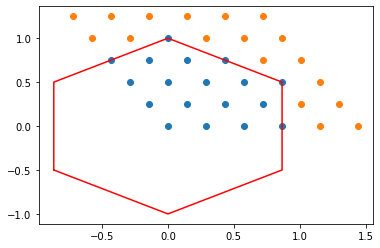

[-1, -1]
(18,)
(13,)


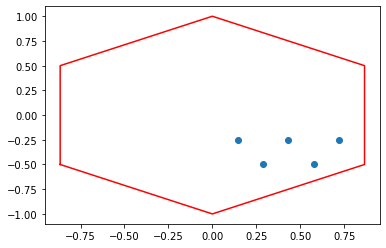

[-1, 0]
(13,)
(5,)


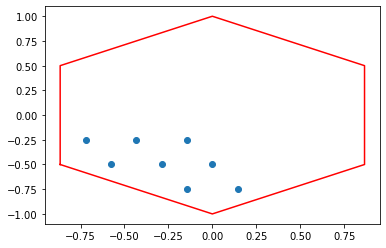

[0, -1]
(5,)
(5,)


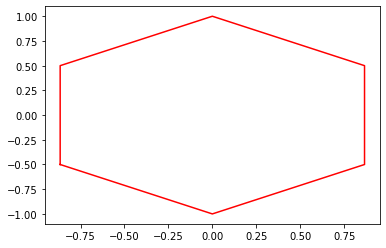

[0, 0]
[0, 1]
(5,)
(0,)


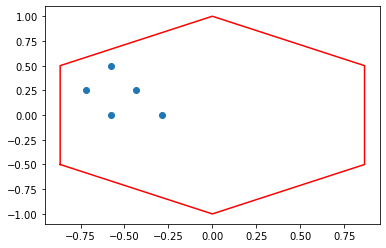

[1, 0]
(0,)
(0,)


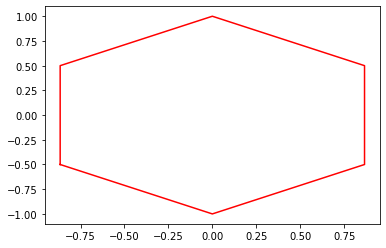

[1, 1]
(0,)
(0,)


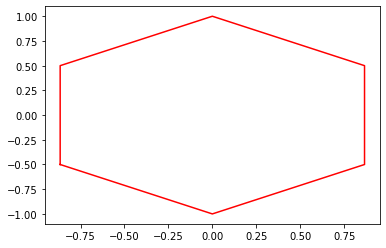

In [37]:

kxx=[]
kyy=[]

uc=1+0.5/LP
dc=1-0.5/LP
print(uc,dc)
kx,ky,KXp, KYp=hexagon3([KXp, KYp], uc*k_window_sizey, KXp, KYp)
kxx=kxx+kx
kyy=kyy+ky
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(kx,ky)
plt.scatter(KXp, KYp)
plt.show()

for U in Ulist:
    G=GM1p*U[0]+GM2p*U[1]
    print(U)
    # kx,ky=hexagon3([KXp+G[0], KYp+G[1]], 0.999999*k_window_sizey)
    # kxx=kxx+kx
    # kyy=kyy+ky
    # plt.plot(VV[:,0], VV[:,1], c='r')
    # plt.scatter(kx,ky)
    # plt.show()
    if not (U[0]==0 and U[1]==0):
        kx,ky,KXp, KYp=hexagon3([KXp+G[0], KYp+G[1]], uc*k_window_sizey, KXp, KYp)
        kxx=kxx+kx
        kyy=kyy+ky
        plt.plot(VV[:,0], VV[:,1], c='r')
        plt.scatter(kx,ky)
        plt.show()

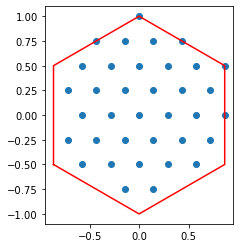

In [61]:
plt.plot(VV[:,0], VV[:,1], c='r')
plt.scatter(kxx,kyy)
# plt.scatter(kxx,np.array(kyy)+0.32)
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.show()

In [39]:
len(kxx)

36

In [40]:
36*36

1296

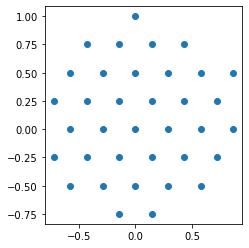

In [41]:
plt.scatter(kxx,kyy)
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.show()

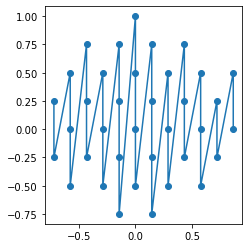

In [52]:
kxx2,kyy2 = zip(*sorted(zip(kxx,kyy)))
kyy3,kxx3 = zip(*sorted(zip(kyy2,kxx2)))
plt.scatter(kxx2,kyy2)
plt.plot(kxx2,kyy2)
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.show()

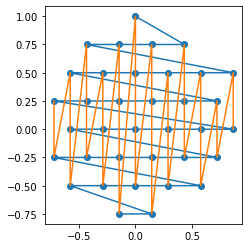

In [54]:
kyy2,kxx2 = zip(*sorted(zip(kyy,kxx)))
kxx3,kyy3 = zip(*sorted(zip(kxx2,kyy2)))

plt.scatter(kxx2,kyy2)
plt.plot(kxx2,kyy2)
plt.plot(kxx3,kyy3)

ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.show()

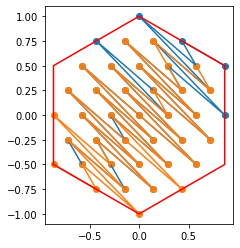

In [57]:
kw2,kyy2 = zip(*sorted(zip(np.array(kxx)+np.array(kyy),kyy)))
kw2,kxx2 = zip(*sorted(zip(np.array(kxx)+np.array(kyy),kxx)))

plt.scatter(kxx2,kyy2)
plt.plot(kxx2,kyy2)

kx=np.array(kxx2)
ky=np.array(kyy2)
plt.scatter(-kx,-ky)
plt.plot(-kx,-ky)

plt.plot(VV[:,0], VV[:,1], c='r')

ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal') #sets the height to width ratio to 1.5. 
plt.show()